## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [4]:
df.drop(['RowNumber','CustomerId','Surname'], axis='columns', inplace=True)
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [5]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


## Exploratory Data Analysis & Visualization
EDA is the process of analysing different features against the target/label to understand and uncover the inter-relationship between them.

Let's visualize some important features against churn.

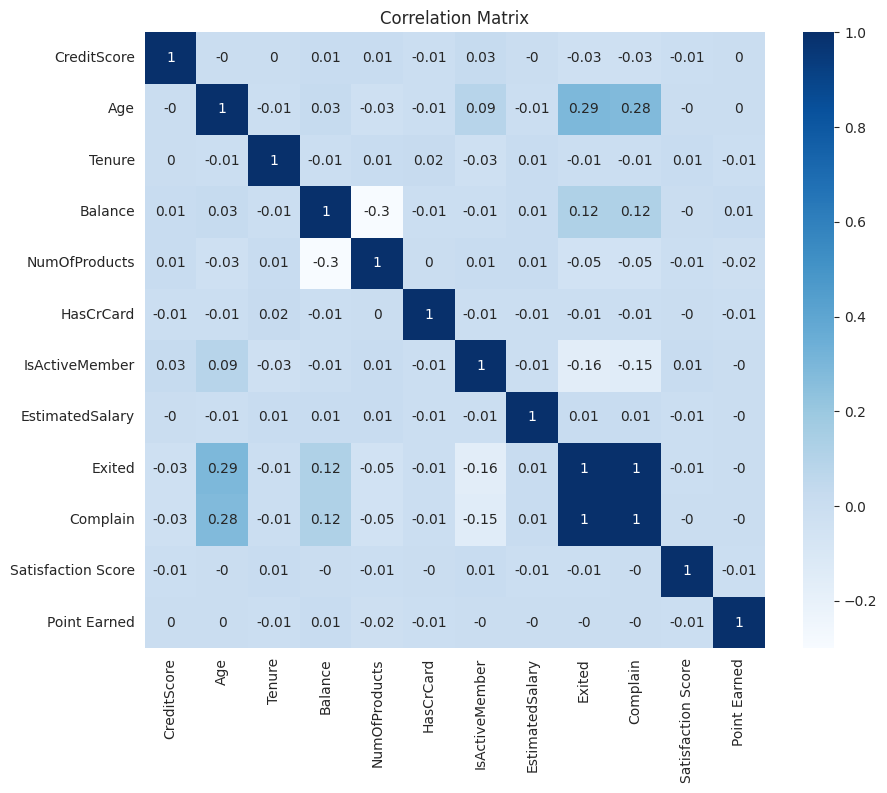

In [6]:
import seaborn as sns
sns.set_style('whitegrid')

corr = df.corr(numeric_only = True).round(2)
plt.figure(figsize = (10,8))
plt.title('Correlation Matrix')
sns.heatmap(data = corr, annot = True, cmap = 'Blues', cbar = True)
plt.show()

In [7]:
corr['Exited'].sort_values(ascending = False)


,Exited
Exited,1.00
Complain,1.00
Age,0.29
Balance,0.12
EstimatedSalary,0.01
Point Earned,-0.00
Tenure,-0.01
HasCrCard,-0.01
Satisfaction Score,-0.01
CreditScore,-0.03


<Axes: >

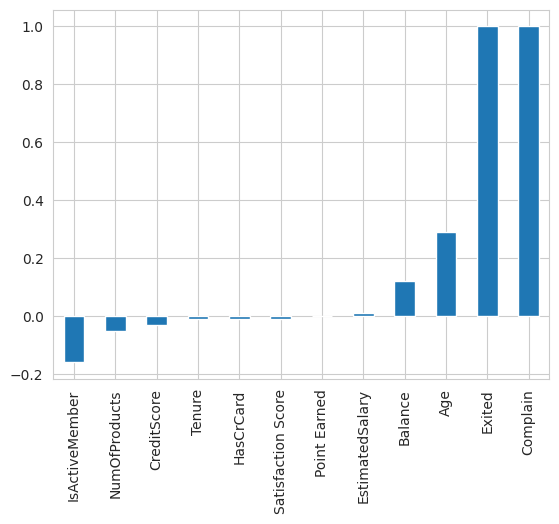

In [8]:
corr['Exited'].sort_values().plot(kind = 'bar')

**OBSERVATIONS**:

* The three important features impacting churn rate in the positive direction is balance, age, and complaint.

* Member status, number of products and credit score are negatively correlated with exited.



* Exited & Complain have a 100% correlation or perfect correlation with each other. We will drop Complain from the model.

```

```



#Churn as Target Variable

Let us now look at the target variable Exited's overall distribution.

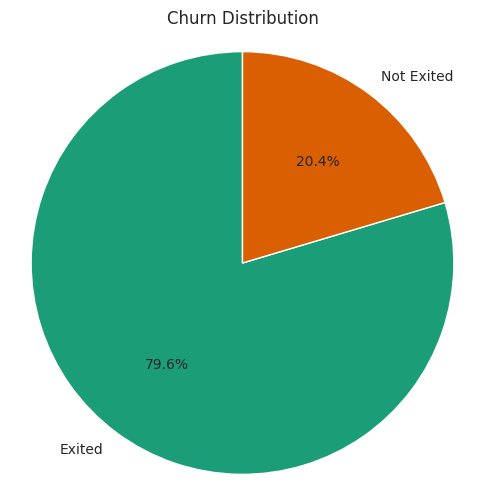

In [9]:
labels = ['Exited', 'Not Exited']
plt.figure(figsize = (6,6))
plt.pie(df['Exited'].value_counts(), labels = labels, colors =plt.cm.Dark2.colors,
           autopct = '%1.1f%%', startangle = 90)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

* 20% of customers are exiting the bank. It is a significant number for any organisation.

#Churn by Gender

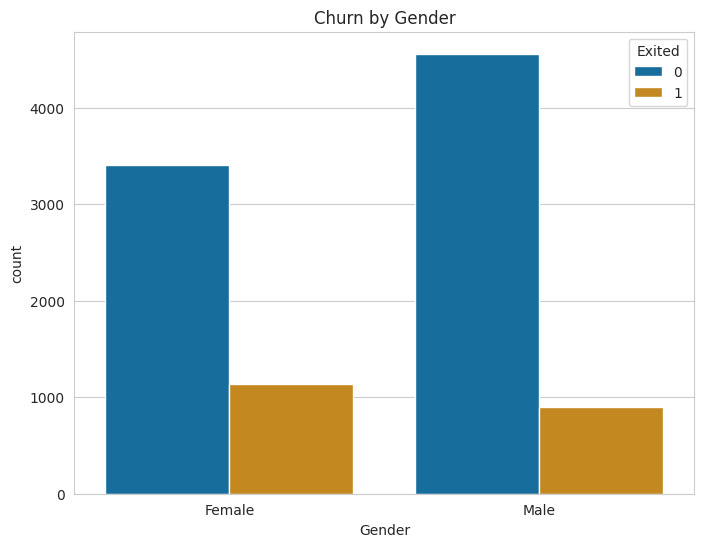

In [10]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'Gender', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Gender')
plt.show()

In [11]:
# Churn Rate by Gender
churn_rate_gender = df.groupby('Gender')['Exited'].mean()*100
print(churn_rate_gender)

Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64


* 25% of customers leaving are female. The corresponding figure for males is 16.47%.

#Churn by Geography

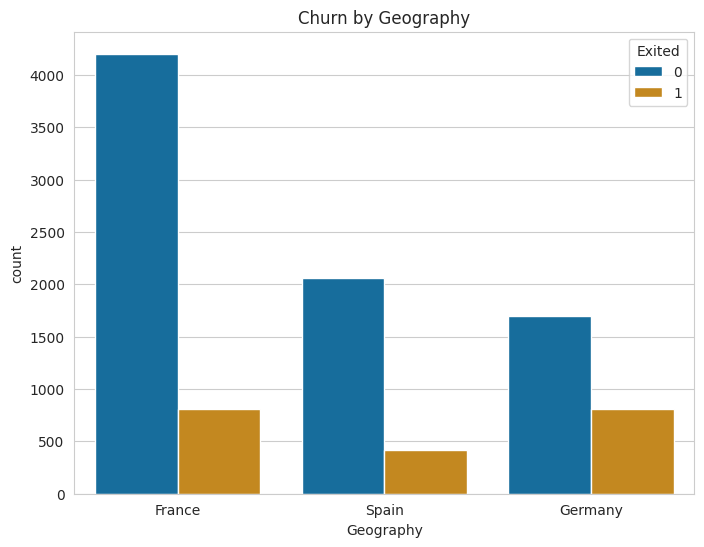

In [12]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'Geography', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Geography')
plt.show()

In [13]:
# Churn Rate by Geography
churn_rate_Geography = df.groupby('Geography')['Exited'].mean()*100
print(churn_rate_Geography)

Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


* Germany has the highest churn rate at 32.44%, followed by Spain and France.

# Churn by AgeGroup

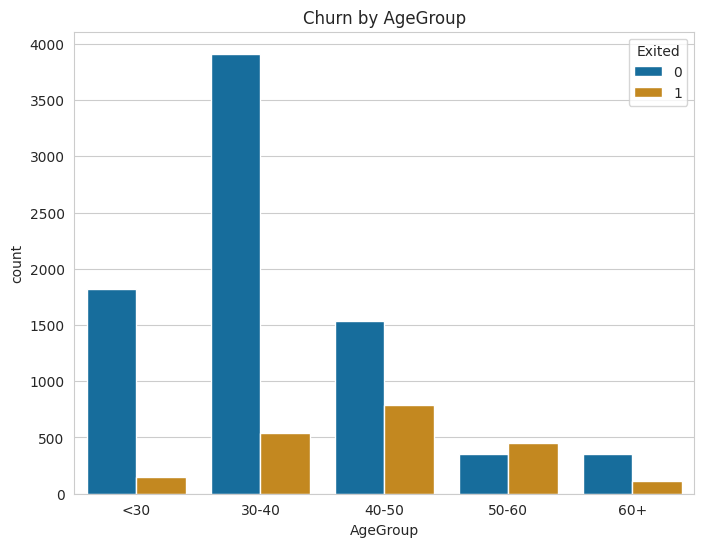

In [14]:
df['AgeGroup'] = pd.cut(df['Age'], bins = [0,30,40,50,60,np.inf], labels = ['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'AgeGroup', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by AgeGroup')
plt.show()

In [15]:
# Churn Rate by AgeGroup
churn_rate_AgeGroup = df.groupby('AgeGroup')['Exited'].mean()*100
print(churn_rate_AgeGroup)

AgeGroup
<30       7.520325
30-40    12.109638
40-50    33.965517
50-60    56.210790
60+      24.784483
Name: Exited, dtype: float64


* 50-60 has the highest churn rate at 56.21%, followed by 40-50 at 34%, and the 60+ category at 25%. The younger customers not Exited.

## Churn by Number of Products
We see a negative correlation between them, so most likely, as number of products go up,churn rate should decrease.

In [16]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'AgeGroup'],
      dtype='object')

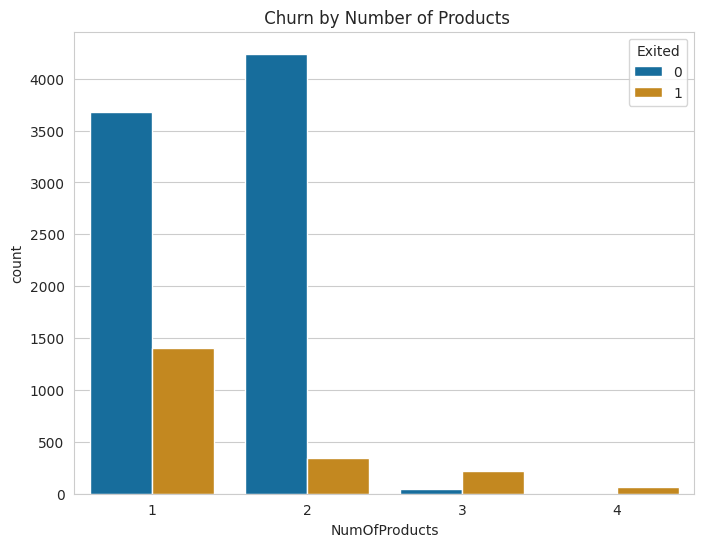

In [17]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'NumOfProducts', hue = 'Exited', palette = 'colorblind')
plt.title(' Churn by Number of Products')
plt.show()

In [18]:
churn_rate_products = df.groupby('NumOfProducts')['Exited'].mean()*100
print(churn_rate_products)

NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64


* customers with more than two products are most likely to leave.

# Churn vs. Credit Card

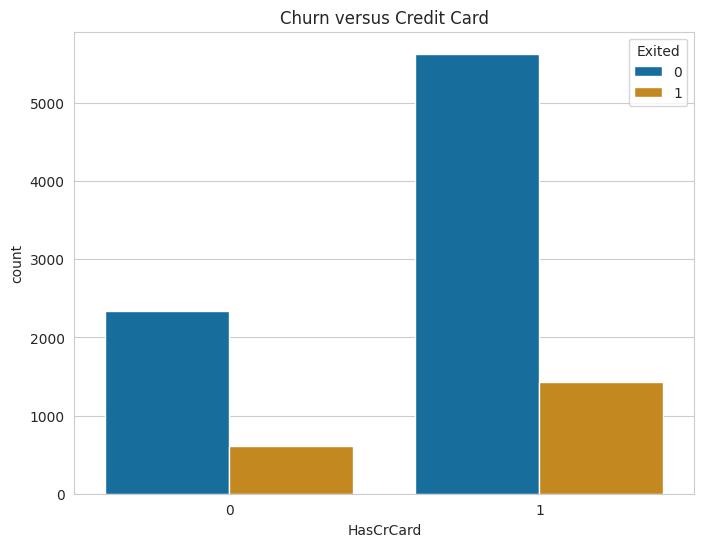

In [19]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'HasCrCard', hue = 'Exited', palette = 'colorblind')
plt.title('Churn versus Credit Card')
plt.show()

In [20]:
churn_rate_card = df.groupby('HasCrCard')['Exited'].mean()*100
print(churn_rate_card)

HasCrCard
0    20.814941
1    20.198441
Name: Exited, dtype: float64


* Customers with credit cards are slightly less likely to exit.

#Churn by Member Activity Status

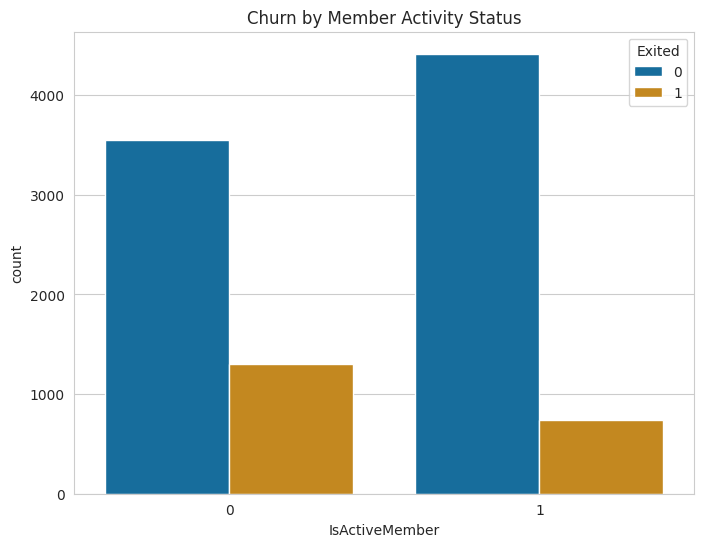

In [21]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'IsActiveMember', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Member Activity Status')
plt.show()

In [22]:
churn_rate_active_status = df.groupby('IsActiveMember')['Exited'].mean()*100
print(churn_rate_active_status)

IsActiveMember
0    26.871520
1    14.269074
Name: Exited, dtype: float64


* As expected, non-active customers are exiting more.

#Churn by Tenure

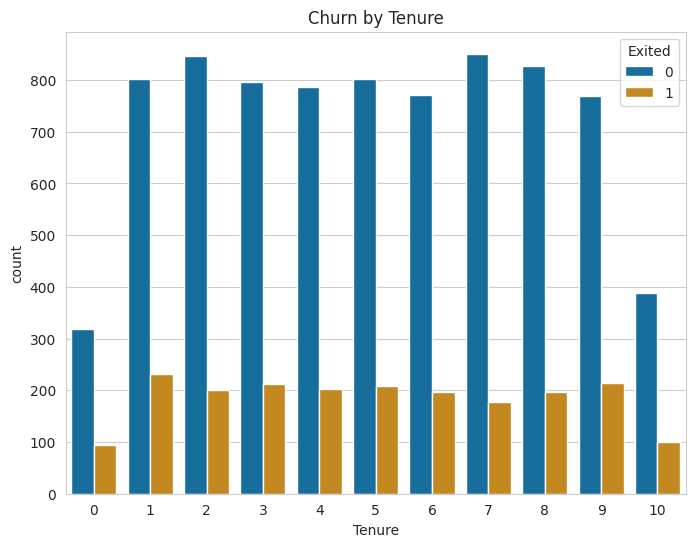

In [23]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'Tenure', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Tenure')
plt.show()

In [24]:
churn_rate_tenure = df.groupby('Tenure')['Exited'].mean()*100
print(churn_rate_tenure)

Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: Exited, dtype: float64


* The average churn rate is around 20% across tenures but customers with ten years are slightly less likely to exit the bank.

## Continuous Variables
Let's look at some of our continous variables and their distributions.

#Credit Score Distribution

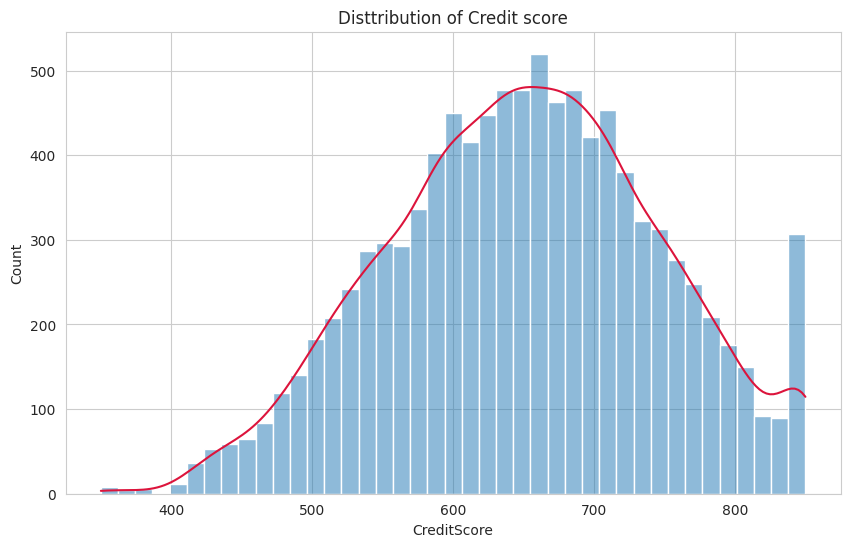

In [25]:
plt.figure(figsize = (10,6))
ax = sns.histplot(data = df, x = 'CreditScore',  kde = True, palette  = 'colorblind')
plt.title('Disttribution of Credit score')
ax.lines[0].set_color('crimson')
plt.show()

* The mean Credit score is about 650.

* The variable has an almost Gaussian Distribution.

#Balance Distribution

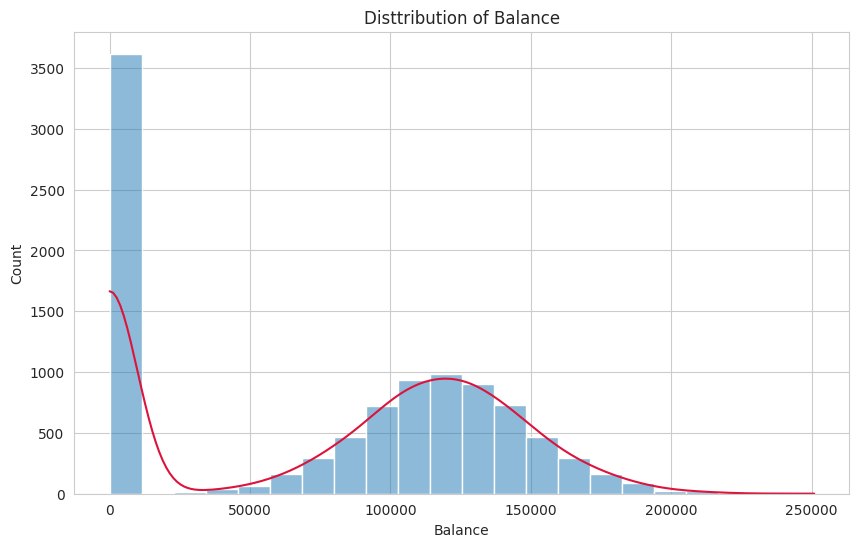

In [26]:
plt.figure(figsize = (10,6))
ax = sns.histplot(data = df, x = 'Balance',  kde = True, palette  = 'colorblind')
plt.title('Disttribution of Balance')
ax.lines[0].set_color('crimson')
plt.show()

* A normal distribution.

* A little over 3500 customers have zero balance in their accounts. This is a significant outlier for a total of 10,000 clients.

#Estimated salary Distribution

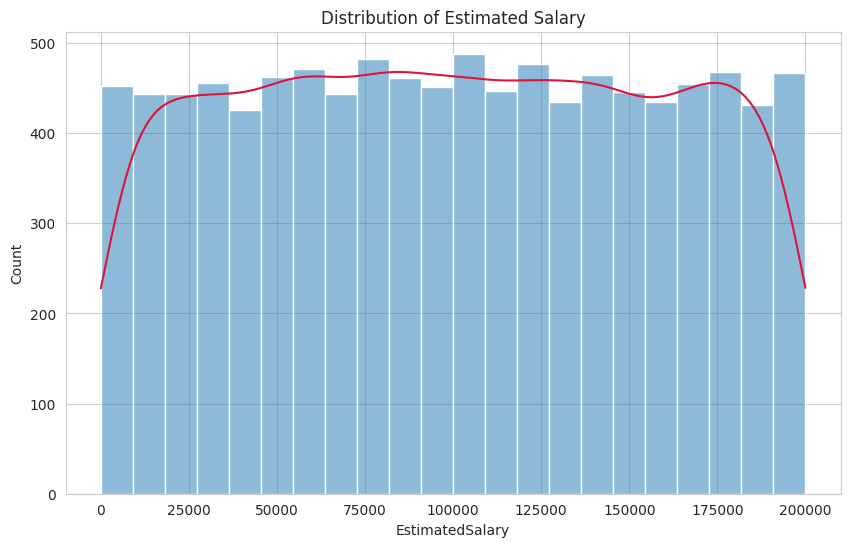

In [27]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Estimated Salary')
ax = sns.histplot(data = df, x = 'EstimatedSalary', palette= 'colorblind', kde = True)
ax.lines[0].set_color('crimson')
plt.show()

* The variable follows a uniform distribution

## Data Preprocessing

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40-50
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40-50
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40-50
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,30-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,40-50


In [29]:
df = df.drop(['AgeGroup'],axis = 1)
df = df[[col for col in df.columns if col != 'Exited'] + ['Exited']]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0


In [30]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)

[[619 'France' 'Female' ... 2 'DIAMOND' 464]
 [608 'Spain' 'Female' ... 3 'DIAMOND' 456]
 [502 'France' 'Female' ... 3 'DIAMOND' 377]
 ...
 [709 'France' 'Female' ... 3 'SILVER' 564]
 [772 'Germany' 'Male' ... 2 'GOLD' 339]
 [792 'France' 'Female' ... 3 'DIAMOND' 911]]


# Encoding Categorical Data

Label Encoding the 'Gender' Column

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [32]:
print(X)

[[619 'France' 0 ... 2 'DIAMOND' 464]
 [608 'Spain' 0 ... 3 'DIAMOND' 456]
 [502 'France' 0 ... 3 'DIAMOND' 377]
 ...
 [709 'France' 0 ... 3 'SILVER' 564]
 [772 'Germany' 1 ... 2 'GOLD' 339]
 [792 'France' 0 ... 3 'DIAMOND' 911]]


Making Dummy Variables by using Onehotencoding

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct =  ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,12,])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [34]:
print(X)

[[1.0 0.0 0.0 ... 1 2 464]
 [0.0 0.0 1.0 ... 1 3 456]
 [1.0 0.0 0.0 ... 1 3 377]
 ...
 [1.0 0.0 0.0 ... 1 3 564]
 [0.0 1.0 0.0 ... 1 2 339]
 [1.0 0.0 0.0 ... 0 3 911]]


## Feature Selection by **"SelectKBest"** function from **"Sklearn"**

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.columns)
featurescores = pd.concat([dfcolumns, dfscores], axis=1)
featurescores.columns = ['Specs', 'Score']
featurescores

,Specs,Score
0,CreditScore,5.464491e+01
1,Geography,2.250089e+02
2,Gender,2.097260e+01
3,Age,3.023953e+00
4,Tenure,1.918365e+00
5,Balance,5.714698e-04
6,NumOfProducts,1.103331e-01
7,HasCrCard,1.029123e+02
8,IsActiveMember,5.130217e+01
9,EstimatedSalary,2.299989e+03


In [36]:
print(featurescores.nlargest(10,'Score'))

                 Specs         Score
11  Satisfaction Score  7.156629e+06
15                 NaN  5.154237e+04
16                 NaN  7.887607e+03
9      EstimatedSalary  2.299989e+03
1            Geography  2.250089e+02
14              Exited  1.185439e+02
7            HasCrCard  1.029123e+02
0          CreditScore  5.464491e+01
8       IsActiveMember  5.130217e+01
2               Gender  2.097260e+01


# Splitting the dataset into the Training set and Test set

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the XGBoost model on the Training set

In [39]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
# predicting the new Test Result
y_pred = classifier.predict(X_test)

## Making Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1595    0]
 [   1  404]]


0.9995

## Making Classification Report

In [41]:
from sklearn.metrics import classification_report
print("Classification Report")

print('\n')

print(classification_report(y_test, y_pred))

Classification Report


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



## Applying K-Fold Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train , y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.84 %
Standard Deviation: 0.14 %


## Calculation of ROC AUC

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {logit_roc_auc:.2f}')

ROC AUC Score: 1.00


##Visualizing the ROC Curve

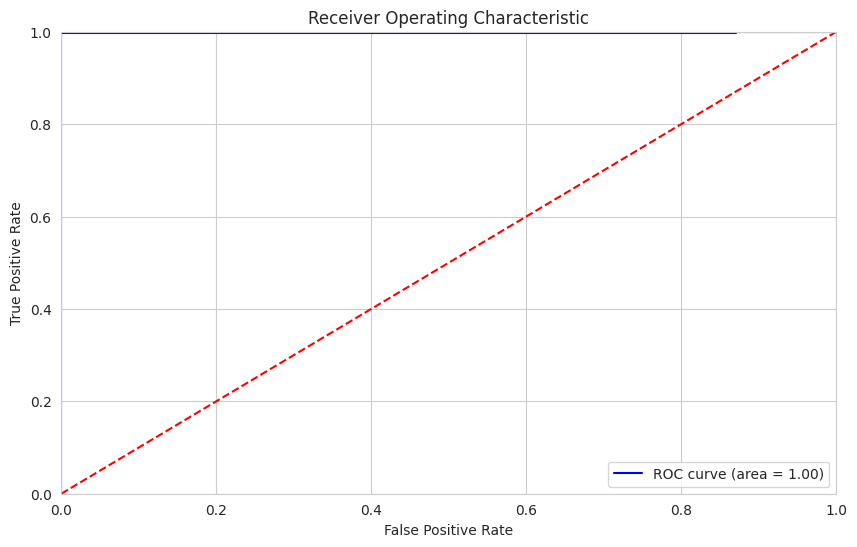

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {logit_roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (random guessing)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#**Concluding Remarks**:
* As the exploratory analysis suggested, the target demographic to minimize churn are women in the age group of 50+ and mostly in Germany.

**(Without Univarate Feature Selection)**
* I trained all the Classification Models and among all of them Random Forest Classification Model  and XGBoost Has the Highest Accuracy Approximately 85%.

**(With Univarate Feature Selection)**
* Then I Try Feature Selection Technique called as univariate Selection
it Automatically Select Best Features W.R.T output. and here I Get an Average Accuracy 99.84% with standard Deviation 0.14%